In [18]:
import time
import datetime
import tqdm
import random
import numpy as np
import matplotlib.pyplot as plt

import vent
from vent import io

In [14]:
hal = io.Hal("../vent/io/config/devices.ini")

  [         adc         ]  opts: {'i2c_bus': 1, 'address': 72}
  [     inlet_valve     ]  opts: {'form': 'Normally Closed'}
  [    control_valve    ]  opts: {'pin': 12, 'form': 'Normally Closed', 'response': '/home/pi/src/vent/vent/io/config/calibration/SMC_PVQ31_5G_23_01N_response'}
  [  expiratory_valve   ]  opts: {'pin': 27, 'form': 'Normally Closed'}
  [   pressure_sensor   ]  opts: {'offset_voltage': 2.25, 'conversion_factor': 70.3, 'MUX': 0, 'adc': <vent.io.devices.base.ADS1015 object at 0xaaa1d1d0>, 'output_span': 2.0}
  [    oxygen_sensor    ]  opts: {'offset_voltage': 2.2, 'conversion_factor': 70.3, 'MUX': 3, 'adc': <vent.io.devices.base.ADS1015 object at 0xaaa1d1d0>, 'output_span': 2.0}
  [   flow_sensor_ex    ]  opts: {'offset_voltage': 2.25, 'conversion_factor': 1, 'MUX': 1, 'adc': <vent.io.devices.base.ADS1015 object at 0xaaa1d1d0>, 'output_span': 4.0}


In [16]:
xs = []
raws = []
setpoints = []
ts = []

hal.setpoint_ex = 1
hal.setpoint_in = 0

for i in tqdm.tqdm(range(11*40)):
#     if i % 40 == 0 and i != 0:
#         hal.setpoint_in += 10
    if hal.setpoint_in > 99.5:
        break
    if i % 10 == 0:
        hal.setpoint_in += 0.5
    setpoints.append(hal.setpoint_in)
    raw = hal._pressure_sensor._raw_read()
    x = hal._pressure_sensor._convert(raw)
    if x < -1:
        if x > -1.1:
            print(i)
        if x < -2:
            break
    xs.append(x)
    raws.append(raw)
    ts.append(datetime.datetime.now().timestamp())
    time.sleep(0.1)

hal.setpoint_in = 0
hal.setpoint_ex = 0
ts, xs = np.array(ts), np.array(xs)

  9%|▉         | 39/440 [00:04<00:42,  9.54it/s]

38


 10%|█         | 44/440 [00:04<00:41,  9.43it/s]

43


 11%|█         | 47/440 [00:04<00:41,  9.47it/s]

46
47


 11%|█▏        | 50/440 [00:05<00:42,  9.18it/s]

49


 16%|█▌        | 71/440 [00:07<00:39,  9.45it/s]


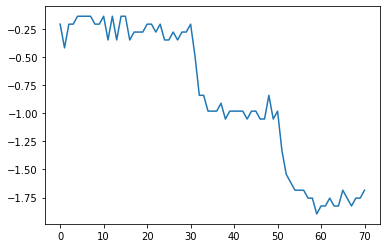

In [19]:
plt.plot(xs)